<a href="https://www.kaggle.com/code/ranjeetkumbhar/ml-assignment-4-te-it-sppu?scriptVersionId=110429853" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Hello this is @Ranjeet_Kumbhar,<br>
Enjoy the Notebook<br>

GitHub:https://github.com/RanjeetKumbhar01/TE_IT_ML_ASSIGNMENTS_SPPU<br>
Dataset: https://archive.ics.uci.edu/ml/datasets/sms%2Bspam%2Bcollection<br>

# Question
Assignment on Improving Performance of Classifier Models<br>
A SMS unsolicited mail (every now and then known as cell smartphone junk mail) is any junk message<br>
brought to a cellular phone as textual content messaging via the Short Message Service (SMS). Use<br>
probabilistic approach (Naive Bayes Classifier / Bayesian Network) to implement SMS Spam Filtering<br>
system. SMS messages are categorized as SPAM or HAM using features like length of message, word<br>
depend, unique keywords etc.<br>
Download Data -Set from : http://archive.ics.uci.edu/ml/datasets/sms+spam+collection<br>
This dataset is composed by just one text file, where each line has the correct class followed by<br>
the raw message.<br>
a. Apply Data pre-processing (Label Encoding, Data Transformation….) techniques if<br>
necessary<br>
b. Perform data-preparation (Train-Test Split)<br>
c. Apply at least two Machine Learning Algorithms and Evaluate Models<br>
d. Apply Cross-Validation and Evaluate Models and compare performance.<br>
e. Apply Hyper parameter tuning and evaluate models and compare performance<br>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-data-set/SMSSpamCollection


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('../input/sms-spam-collection-data-set/SMSSpamCollection',sep='\t',names=['label','text'])

In [4]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Data Pre-processing

In [5]:
df.shape

(5572, 2)

In [6]:
import nltk #!pip install nltk

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
sent = 'How are you friends?'

In [9]:
from nltk.tokenize import word_tokenize
word_tokenize(sent)

['How', 'are', 'you', 'friends', '?']

In [10]:
from nltk.corpus import stopwords
swords = stopwords.words('english')

In [11]:
clean = [word for word in word_tokenize(sent) if word not in swords]

In [12]:
clean

['How', 'friends', '?']

In [13]:
# Stemming words with NLTK
from nltk.stem import PorterStemmer
ps = PorterStemmer()
clean = [ps.stem(word) for word in word_tokenize(sent) 
         if word not in swords]
clean

['how', 'friend', '?']

In [14]:
sent = 'Hello friends! How are you? We will learning python today'

In [15]:
def clean_text(sent):
    tokens = word_tokenize(sent)
    clean = [word for word in tokens if word.isdigit() or word.isalpha()]
    clean = [ps.stem(word) for word in clean
         if word not in swords]
    return clean

In [16]:
clean_text(sent)

['hello', 'friend', 'how', 'we', 'learn', 'python', 'today']

In [17]:
# Pre-processing 
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
tfidf = TfidfVectorizer(analyzer=clean_text)

In [19]:
x = df['text']
y = df['label']

In [20]:
x_new = tfidf.fit_transform(x)

In [21]:
x.shape

(5572,)

In [22]:
x_new.shape

(5572, 6513)

In [23]:
# tfidf.get_feature_names()

<AxesSubplot:xlabel='label', ylabel='count'>

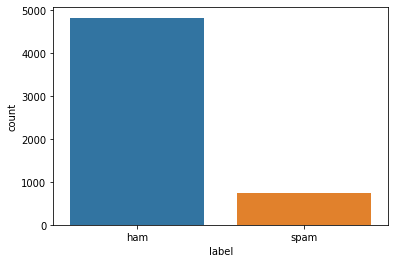

In [24]:
import seaborn as sns
sns.countplot(x=y)

In [25]:
#cross validation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size=0.25,random_state=1)

In [26]:
print(f"Size of splitted data")
print(f"x_train {x_train.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test {x_test.shape}")
print(f"y_test {y_test.shape}")

Size of splitted data
x_train (4179, 6513)
y_train (4179,)
y_test (1393, 6513)
y_test (1393,)


In [27]:
from sklearn.naive_bayes import GaussianNB

In [28]:
nb = GaussianNB()
nb.fit(x_train.toarray(),y_train)
y_pred_nb = nb.predict(x_test.toarray())

In [29]:
y_test.value_counts()

ham     1208
spam     185
Name: label, dtype: int64

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

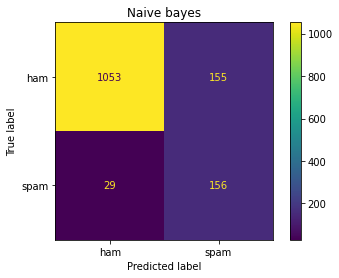

 Accuracy is 0.867910983488873
              precision    recall  f1-score   support

         ham       0.97      0.87      0.92      1208
        spam       0.50      0.84      0.63       185

    accuracy                           0.87      1393
   macro avg       0.74      0.86      0.77      1393
weighted avg       0.91      0.87      0.88      1393



In [31]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_nb)
plt.title('Naive bayes')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_nb)}")
print(classification_report(y_test,y_pred_nb))

In [32]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=1)
model_rf.fit(x_train,y_train)


RandomForestClassifier(random_state=1)

In [33]:
y_pred_rf = model_rf.predict(x_test) #float

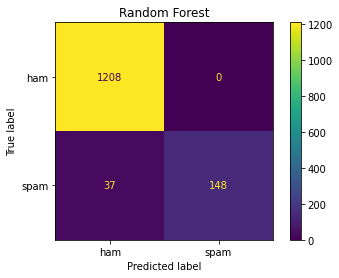

 Accuracy is 0.9734386216798278
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1208
        spam       1.00      0.80      0.89       185

    accuracy                           0.97      1393
   macro avg       0.99      0.90      0.94      1393
weighted avg       0.97      0.97      0.97      1393



In [34]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf)
plt.title('Random Forest')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_rf)}")
print(classification_report(y_test,y_pred_rf))

In [35]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state=1)

model_lr.fit(x_train,y_train)
y_pred_lr = model_lr.predict(x_test)

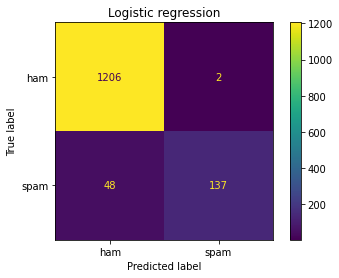

 Accuracy is 0.9641062455132807
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1208
        spam       0.99      0.74      0.85       185

    accuracy                           0.96      1393
   macro avg       0.97      0.87      0.91      1393
weighted avg       0.96      0.96      0.96      1393



In [36]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lr)
plt.title('Logistic regression')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_lr)}")
print(classification_report(y_test,y_pred_lr))

# Hyper parameter tunning

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
para = {
    
    'criterion':['gini', 'entropy','log_loss'],
#     'max_features': ['sqrt','log2'],
#     'random_state': [0,1,2,3,4],
    'class_weight':['balanced','balanced_subsample']
}

In [39]:
grid = GridSearchCV(model_rf, param_grid=para, cv=5, scoring='accuracy')

In [40]:
grid.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/para

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss']},
             scoring='accuracy')

In [41]:
rf = grid.best_estimator_

In [42]:
y_pred_grid = rf.predict(x_test)

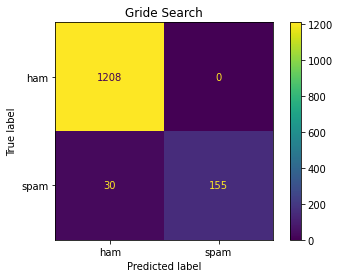

 Accuracy is 0.9784637473079684
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       1.00      0.84      0.91       185

    accuracy                           0.98      1393
   macro avg       0.99      0.92      0.95      1393
weighted avg       0.98      0.98      0.98      1393



In [43]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_grid)
plt.title('Gride Search')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_grid)}")
print(classification_report(y_test,y_pred_grid))